# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANCWelfareModelClass()

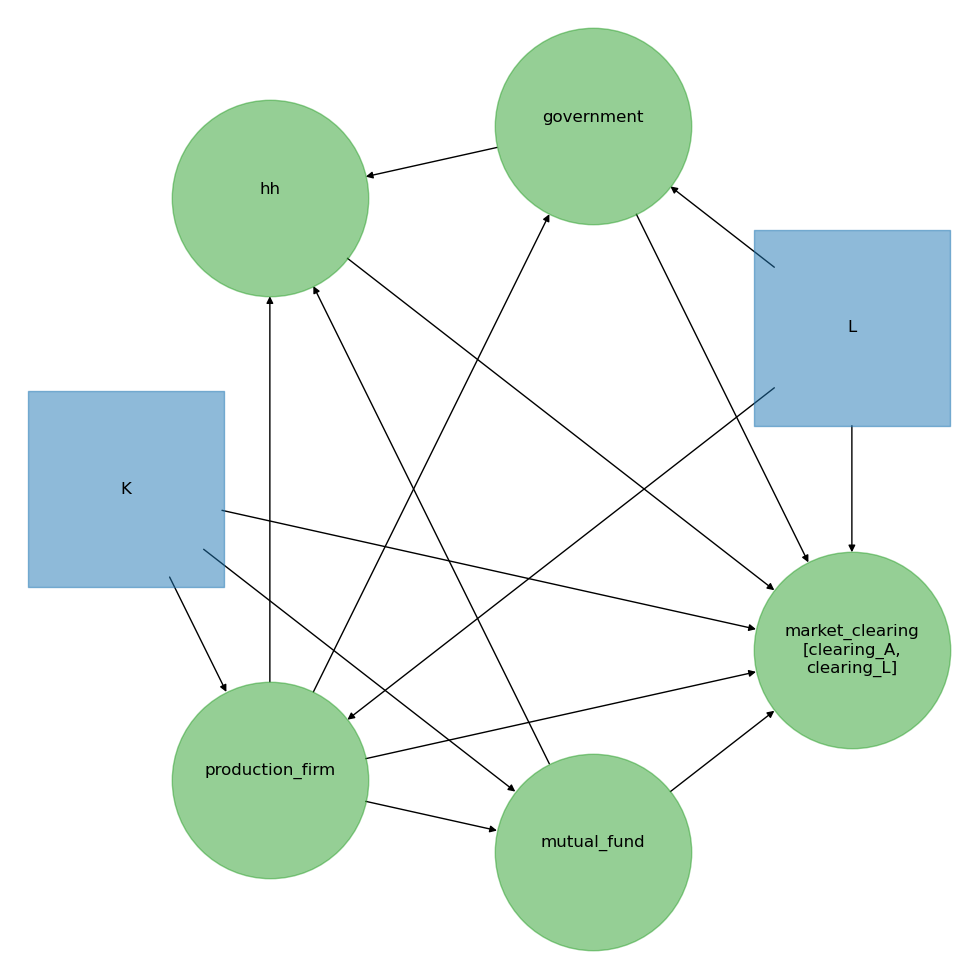

In [3]:
model.draw_DAG()

In [4]:
model.find_ss(do_print=True)

starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: 6.932232565759477e-13
       x: [ 3.673e+00]
    nfev: 8
    fjac: [[-1.000e+00]]
       r: [-8.480e+00]
     qtf: [-6.223e-08]

steady state found in 18.9 secs
ss.K =  3.389
ss.B =  0.000
ss.A_hh =  3.389
ss.L =  0.923
ss.Lg =  0.000
ss.Y =  1.363
ss.G =  0.000
ss.r =  0.021
ss.w =  1.034
ss.wt =  1.034
ss.clearing_A = 6.93e-13
ss.clearing_L = 0.00e+00
ss.clearing_Y = 1.29e-10


In [5]:
par = model.par
ss = model.ss

We can now solve and simulate:

In [6]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 1.8 secs [363 iterations]


In [7]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.0 secs [460 iterations]


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 5.0 secs
household problem simulated along transition in 2.2 secs



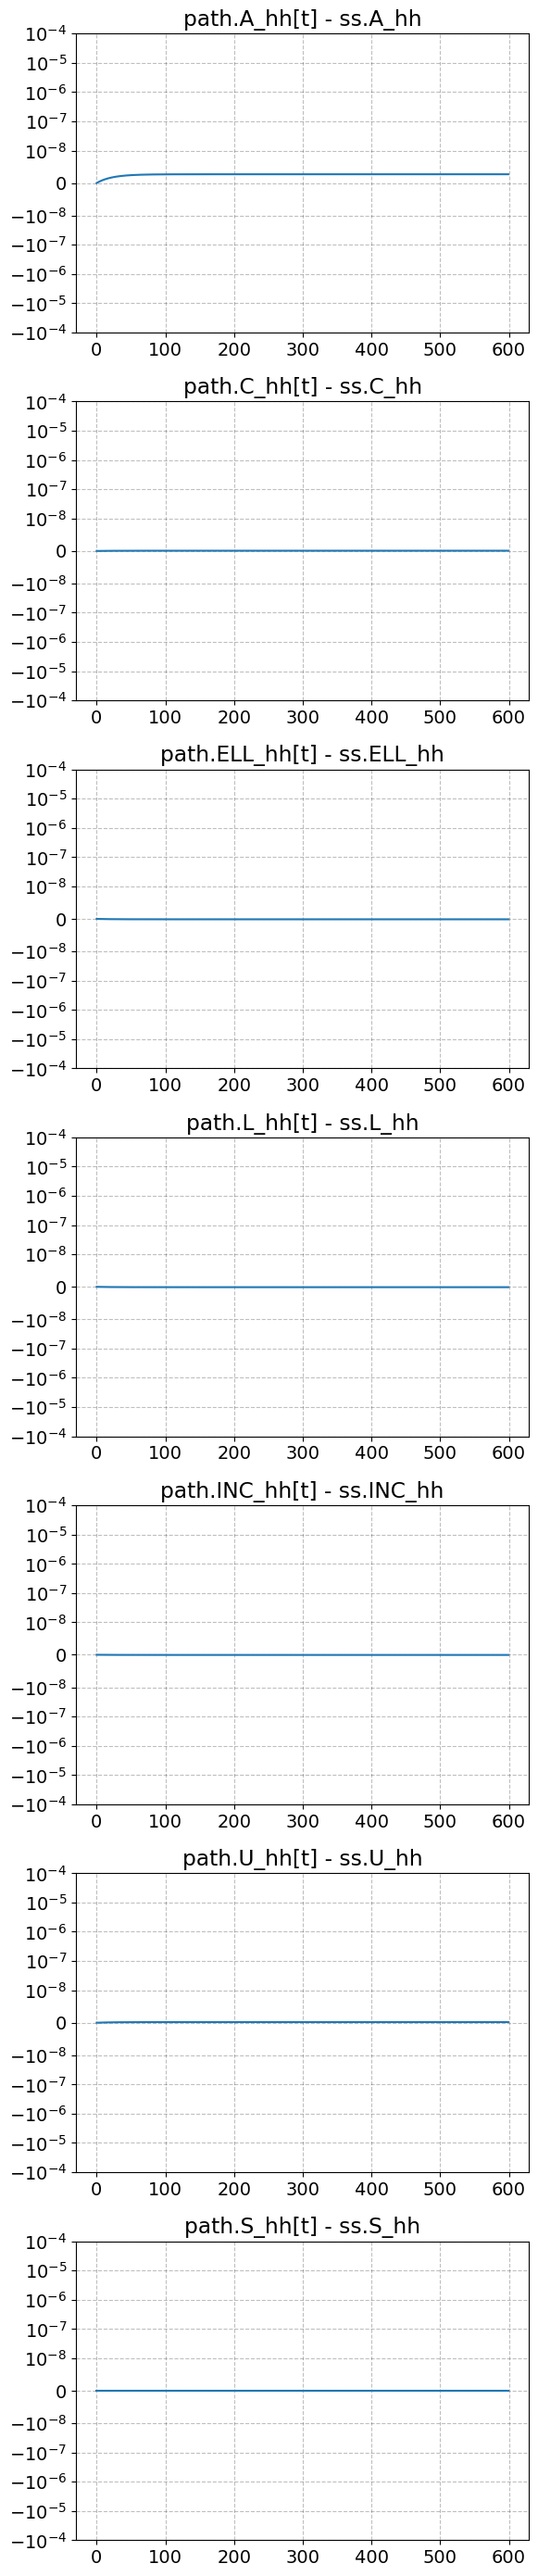

In [8]:
model.test_hh_path()

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

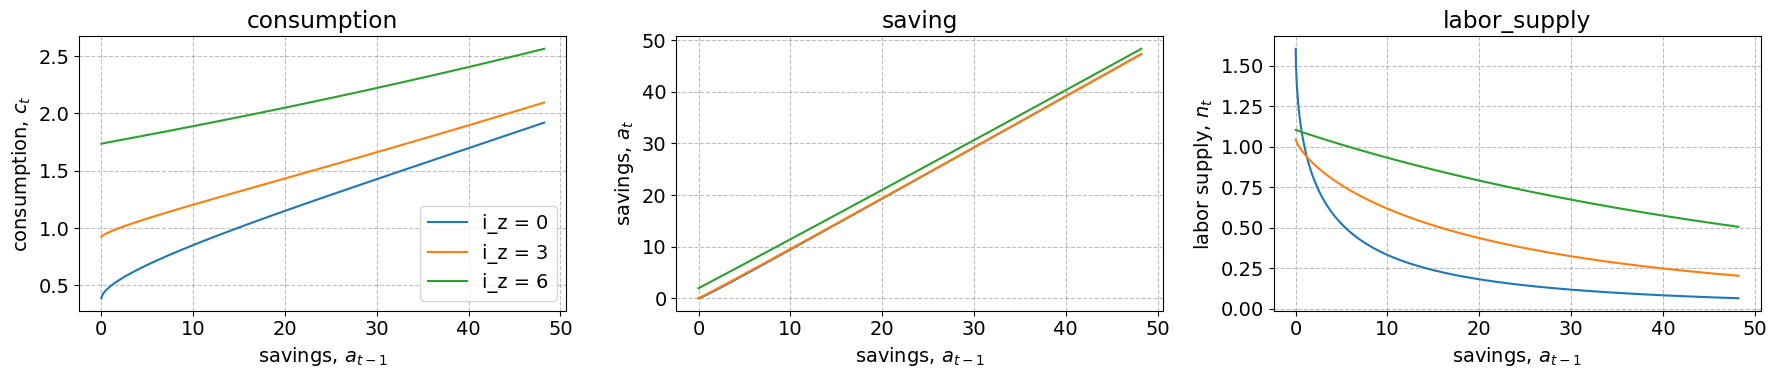

In [9]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()

## 7. <a id='toc7_'></a>[Simulation](#toc0_)

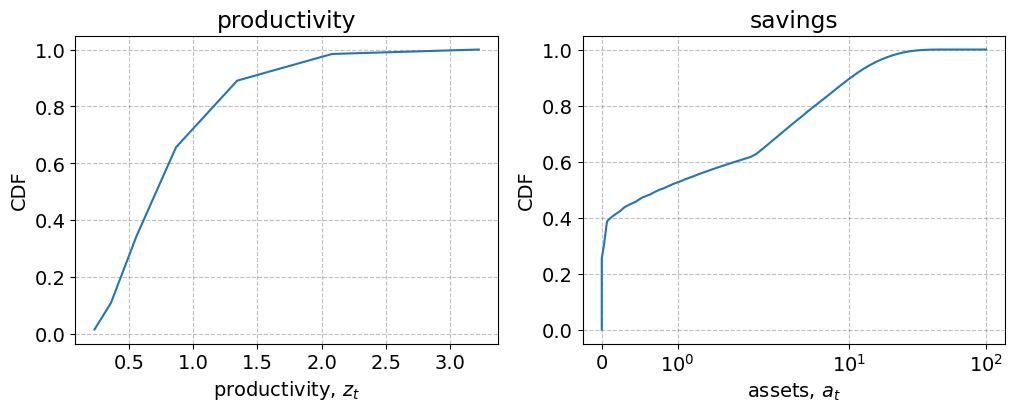

In [10]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

## 8. <a id='toc8_'></a>[Test transition path](#toc0_)

In [11]:
try:
    model.test_ss()
except Exception as e:
    print('you need to update GEModelTools to call this function (optional)')

K              :       3.3887
L              :       0.9225
rK             :       0.1207
w              :       1.0342
Y              :       1.3630
A              :       3.3887
r              :       0.0207
B              :       0.0000
G              :       0.0000
tau            :       0.0000
Lg             :       0.0000
wt             :       1.0342
A_hh           :       3.3887
C_hh           :       1.0241
ELL_hh         :       0.9897
L_hh           :       0.9225
INC_hh         :       1.0241
U_hh           :      -1.6179
S_hh           :       0.0000
I              :       0.3389
clearing_A     :       0.0000
clearing_L     :       0.0000
clearing_Y     :       0.0000


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 2.4 secs
household problem simulated along transition in 0.3 secs



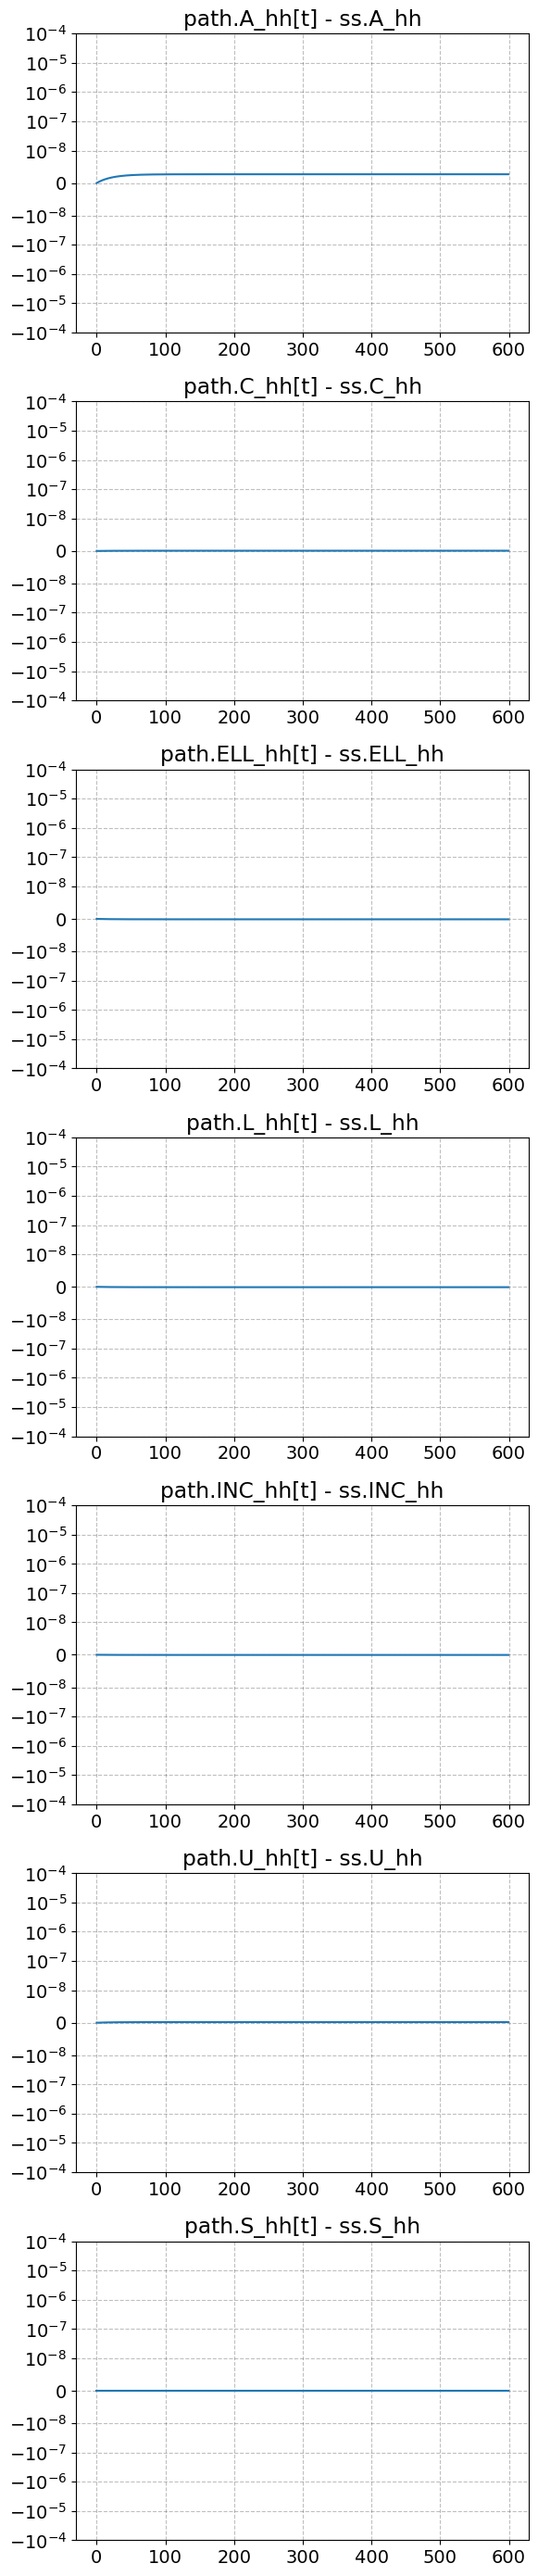

In [12]:
model.test_hh_path()

In [13]:
model.test_path(in_place=True)

shocks: 
unknowns: K L 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 B                0.0e+00
 G                0.0e+00
 tau              0.0e+00
 Lg               0.0e+00
 wt               0.0e+00
hh
 A_hh             2.7e-09
 C_hh             7.7e-11
 ELL_hh           1.2e-10
 L_hh             1.0e-10
 INC_hh           4.9e-11
 U_hh             1.9e-10
 S_hh             0.0e+00
blocks.market_clearing
 I                1.1e-16
 clearing_A       2.7e-09 [target]
 clearing_L       1.0e-10 [target]
 clearing_Y       7.7e-11


## 9. <a id='toc9_'></a>[Find transition path](#toc0_)

In [14]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 2.1 secs
curly_Y and curly_D calculated for w               in 2.1 secs
curly_Y and curly_D calculated for wt              in 2.7 secs
curly_E calculated in 5.7 secs
builiding blocks combined in 0.8 secs
household Jacobian computed in 13.3 secs

full Jacobians:
full Jacobian to unknowns computed in 1.9 secs [in evaluate_blocks(): 1.3 secs]
full Jacobian to shocks computed in 0.2 secs [in evaluate_blocks(): 0.0 secs]


In [15]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.70e-09
   2.70e-09 in clearing_A
   1.04e-10 in clearing_L
 it =   1 -> max. abs. error = 1.20e-13
   1.20e-13 in clearing_A
   4.11e-15 in clearing_L

transition path found in 5.2 secs


In [16]:
v = np.sum([par.beta**t * np.sum((ss.u+(ss.G+par.S)**(1-par.omega)/(1-par.omega)) * ss.D / (np.sum(ss.D))) for t in range(par.T)])
print(v)

-2500000040.3909545


In [35]:
n_tau = 10
tau_vec = np.linspace(0.45, 0.55, n_tau)

chi_min = -0.30
chi_max = -0.20
n_chi = int((chi_max - chi_min) * 100)
chi_vec = np.linspace(chi_min, chi_max, n_chi)

u_vec = np.nan * np.ones((n_tau, n_chi))

model_ = model.copy()

for i, tau_ss in enumerate(tau_vec):
    
    model_.par.tau_ss = tau_ss
    model_.find_ss()


    
    print('NEXT TAU')
    print('')

    print(f'{model_.par.tau_ss = :.2f}')
    print(f'chi span {chi_min},{chi_max}')
    print('')

    for j, chi in enumerate(chi_vec):
        model_.par.chi = chi

        try:
            model_.find_ss()

            print(f'{model_.par.tau_ss = :.2f}')
            print(f'{model_.par.chi = :.2f}')

            u_vec[i, j] = np.sum([model_.par.beta ** t * np.sum((model_.ss.u + (model_.ss.G + model_.par.S) ** (1 - model_.par.omega) / (1 - model_.par.omega)) * model_.ss.D / (np.sum(model_.ss.D))) for t in range(model_.par.T)])

            print(f'{u_vec[i, j] = :.2f}')
        except Exception as e:
            print(f'Error in iteration {j}, {model_.par.chi = :.2f}, {model_.par.tau_ss = :.2f} : {str(e)}')
            u_vec[i, j] = np.nan
            pass

        print('')


NEXT TAU

model_.par.tau_ss = 0.45
chi span -0.3,-0.2

model_.par.tau_ss = 0.45
model_.par.chi = -0.30
u_vec[i, j] = -137.44

model_.par.tau_ss = 0.45
model_.par.chi = -0.29
u_vec[i, j] = -137.21

model_.par.tau_ss = 0.45
model_.par.chi = -0.28
u_vec[i, j] = -137.05

model_.par.tau_ss = 0.45
model_.par.chi = -0.26
u_vec[i, j] = -136.95

model_.par.tau_ss = 0.45
model_.par.chi = -0.25
u_vec[i, j] = -136.91

model_.par.tau_ss = 0.45
model_.par.chi = -0.24
u_vec[i, j] = -136.95

model_.par.tau_ss = 0.45
model_.par.chi = -0.23
u_vec[i, j] = -137.06

model_.par.tau_ss = 0.45
model_.par.chi = -0.21
u_vec[i, j] = -137.25

model_.par.tau_ss = 0.45
model_.par.chi = -0.20
u_vec[i, j] = -137.52

NEXT TAU

model_.par.tau_ss = 0.46
chi span -0.3,-0.2

model_.par.tau_ss = 0.46
model_.par.chi = -0.30
u_vec[i, j] = -137.76

model_.par.tau_ss = 0.46
model_.par.chi = -0.29
u_vec[i, j] = -137.46

model_.par.tau_ss = 0.46
model_.par.chi = -0.28
u_vec[i, j] = -137.22

model_.par.tau_ss = 0.46
model_.par.ch

In [25]:
print(u_vec)
print(chi_vec)
print(tau_vec)

[[-137.44096235 -137.21426241 -137.04906331 -136.94801817 -136.91402119
  -136.95021214 -137.05995588 -137.24703148 -137.51553089]
 [-137.7584962  -137.45994317 -137.22198097 -137.0471371  -136.93816212
  -136.8979988  -136.92990863 -137.03744877 -137.22448853]
 [-138.16868092 -137.79755181 -137.48625707 -137.23720144 -137.05297188
  -136.93639513 -136.89058495 -136.9188773  -137.02495961]
 [-138.67412245 -138.22945979 -137.84401158 -137.52006961 -137.26006351
  -137.06673258 -136.94301957 -136.89212095 -136.9175217 ]
 [-139.27785783 -138.75844898 -138.29777785 -137.89795011 -137.56141924
  -137.29075226 -137.08874262 -136.95842126 -136.90310714]
 [-139.98339305 -139.38772251 -138.85042813 -138.37360015 -137.95952852
  -137.61065268 -137.32964651 -137.11939465 -136.98304011]
 [-140.79467677 -140.12100997 -139.50550859 -138.95022135 -138.45728641
  -138.02905624 -137.66806481 -137.37706943 -137.15906159]
 [-141.7163728  -140.9626053  -140.26701068 -139.63148655 -139.05808979
  -138.5490